<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IRIS-Morse-Graphs" data-toc-modified-id="IRIS-Morse-Graphs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IRIS Morse Graphs</a></span></li></ul></div>

In [1]:
# basics
import os
import time
import numpy as np
import pandas as pd

# scipy and sklearn
from scipy.stats import entropy
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import seaborn as sns
from IPython.display import Image
from matplotlib.patches import Rectangle

# CMDGB
import graphviz
from CMGDB import PlotMorseSets, PlotMorseGraph

# local
from data_loaders import retrieve_predictions
from models import *
from utils import get_model_weights, convert_weight_dict_to_dataframe, compute_morse_graph, \
                  compute_morse_graph_with_gpflow_gp, compute_order_retraction, PlotOrderRetraction

sns.set()
plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# IRIS Morse Graphs

Config:

** Make sure to restart kernel before each new config run! Easiest way is to click on "Restart & Run All"

In [3]:
# Pick interesting_iris from: ["iris_baseline", "iris_layers_2", "iris_epoch_450"]
interesting_iris = "iris_epoch_450"
# Pick smallest_or_largest from: ["smallest", "largest"]
smallest_or_largest = "largest"

Code:

[-2.61753082 -2.89198698]


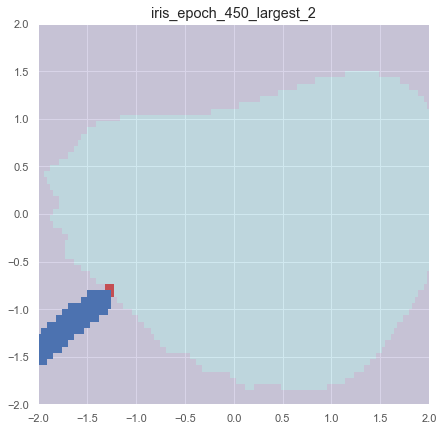

In [5]:
weights = get_model_weights("data/{}".format(interesting_iris))
weights = convert_weight_dict_to_dataframe(weights)

final_weights = weights.loc[weights["epoch"] != "1"]    
weight_cols = [c for c in list(final_weights.columns) if c not in ["model_id", "epoch", "val_loss"]]
std_df = pd.DataFrame(columns=["weight_name", "std"],
                      data=list(zip(weight_cols, [np.std(final_weights[col]) for col in weight_cols])))
std_df = std_df.sort_values(by="std")

if smallest_or_largest == "smallest":
    two_weights = list(std_df["weight_name"])[:2]
elif smallest_or_largest == "largest":
    two_weights = list(std_df["weight_name"])[-2:]
else:
    raise ValueError()

morseg, mapg = compute_morse_graph(weights[['epoch'] + two_weights], phase_subdiv=15)

compute_order_retraction(morseg, mapg, title="{}_{}_2".format(interesting_iris, smallest_or_largest))

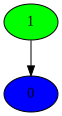

In [6]:
PlotMorseGraph(morseg)

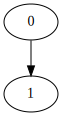

In [7]:
graphviz.Source.from_file('Hasse.dot')

In [8]:
# MUST BE SET MANUALLY FOR EACH RUN BASED ON ABOVE MORSE GRAPHS
morse_nodes_map = {2:0, 1:1, 0:2}

In [9]:
with open('CMGDB_retract.txt','r') as infile:
    retract_indices = []
    retract_tiles = []
    for i in range(mapg.num_vertices()): 
        index, tile = [int(x) for x in next(infile).split()]
        retract_indices.append(index)
        retract_tiles.append(tile)

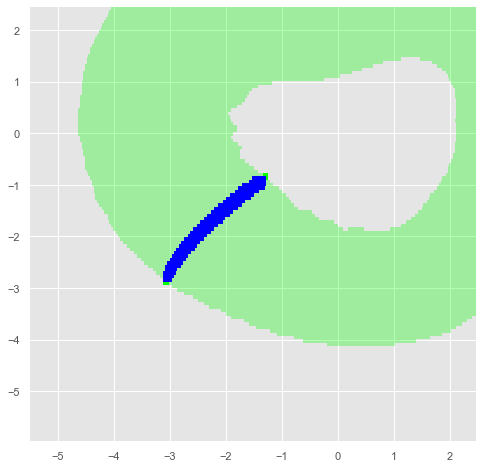

In [10]:
PlotOrderRetraction(morseg, mapg, retract_tiles, retract_indices, morse_nodes_map)